# Comparison of the performances of classification models
"""Adem Baran Orhan"""

Builded  kNN and logistic regression classifiers 
Our purpose is predict "satisfaction" 
-Shuffled and split your data into train, validation and test sets. 

-Compared 2 classification models according to their accuracies 

-Confusion matrices for models

-Precision-Recall (PR) curves for each classification model over the test set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
KFold
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#Reading the data file
#Printing length of the dataframe and first 5 rows
df = pd.read_csv('data.csv')
print("Total rows:",len(df))
print("Total columns: ",len(df.columns))
display(df.head())

Total rows: 1735
Total columns:  23


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
#Converting categorical values to numerical values with the LabelEncoder and printing which numbers represents which value
le = LabelEncoder()

encoded_satis = le.fit_transform(df['satisfaction'])
df['satisfaction'] = encoded_satis

encoded_gender = le.fit_transform(df['Gender'])
df['Gender'] = encoded_gender

encoded_cust_type = le.fit_transform(df['Customer Type'])
df['Customer Type'] = encoded_cust_type

encoded_travel_type = le.fit_transform(df['Type of Travel'])
df['Type of Travel'] = encoded_travel_type

encoded_class = le.fit_transform(df['Class'])
df['Class'] = encoded_class

print("After the converting categorical variables to numerical variables")
print("Satisfied=1,Dissatisfied=0")
print("Male=1, Female = 0")        
print("Loyal Customer = 0, Disloyal Customer = 1")
print("Business Travel = 0, Personal Travel = 1")
print("Eco =1, Eco Plus = 2, Business = 0")

display(df.head())

After the converting categorical variables to numerical variables
Satisfied=1,Dissatisfied=0
Male=1, Female = 0
Loyal Customer = 0, Disloyal Customer = 1
Business Travel = 0, Personal Travel = 1
Eco =1, Eco Plus = 2, Business = 0


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
#Viewing null values 
print("Null in Dataframe set")
print("---------------------")
print(df.isnull().sum())

Null in Dataframe set
---------------------
satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             5
dtype: int64


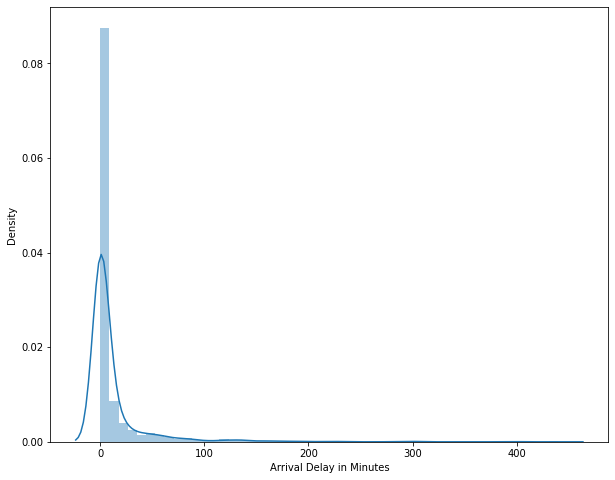

In [ ]:
#For understanding the missing values at the column and, we understand that graph is skewed. So best way to impute is mode.
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['Arrival Delay in Minutes'])

In [ ]:
#We have only 5 nan values,and above figure shows us which imputation will be better, so we impute with the mode of the that column
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0],inplace=True)
print("Null in Dataframe set")
print("---------------------")
print(df.isnull().sum())

Null in Dataframe set
---------------------
satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [ ]:
#shuffling whole data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  

#splitting data to x and y. y is output and x is input
x = df.drop(columns = ['satisfaction']).copy()
y = df['satisfaction'].to_frame()

#Importing minmax scaler and using it on x
#using scaler because decreasing the diffucilty of modeling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#for spliting data to 3 sets(train,valid,test) we will use 2 times train_test_split
#ratio is 70:10:20 with order 
# stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter 'stratify'.
#%10 of our data is equals 173,5 and I rounded it to 174 rows
#%20 of our data is equals 347 to obtain this row numbers we used 0.3344
x_train, x_rest, y_train, y_rest = train_test_split(x,y, train_size=0.7,random_state = 0,stratify=y) 
x_valid, x_test, y_valid, y_test = train_test_split(x_rest,y_rest,train_size=0.3344,random_state=0)

print("x_train:",x_train.shape), print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape), print("y_train: ",y_valid.shape)
print("x_test: ",x_test.shape), print("y_test: ",y_test.shape)

x_train: (1214, 22)
y_train:  (1214, 1)
x_valid:  (174, 22)
y_train:  (174, 1)
x_test:  (347, 22)
y_test:  (347, 1)


(None, None)

# Logistic Regression Classification

In [ ]:
#Logistic Regression Implementation

# Making predictions and measuring accuracy
lr = LogisticRegression()
lr.fit(x_train,y_train) #building model with the train set

predictions = lr.predict(x_valid) #using validation set to see accuracy and to do parameter selection
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy score is: ",accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_valid,predictions))




Accuracy score is:  0.9885057471264368
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.98      0.99        89

    accuracy                           0.99       174
   macro avg       0.99      0.99      0.99       174
weighted avg       0.99      0.99      0.99       174



In [ ]:
# Cross Validation  

lr = LogisticRegression()
scores = cross_val_score(lr, x, y, cv=10)
scores.sort()
accuracy_logreg = scores.mean()

print(scores)
print("Cross validation Accuracy", accuracy_logreg)

[0.94219653 0.94797688 0.97109827 0.97126437 0.97126437 0.97701149
 0.97701149 0.98265896 0.98843931 0.99425287]
Cross validation Accuracy 0.9723174539897681


In [ ]:
#So we have seen two different accuracy. Validation is 0.97 and training accuracy is 0.98. This is normal that validation accuracy lower than the training one.
#Important thing is getting the best possible validation accuracy, since this is actually somewhat reflective of how the model will perform in the real life.
#F1 Score is used to measure a test’s accuracy

In [ ]:
# Making Predictions on Test data

lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions_test = lr.predict(x_test)


test_df = pd.DataFrame({'Satisfaction':predictions_test})
test_df.head(10)
#Below table shows us how our model predicting the satisfaction values. Except the 4th one other predictions are true.

,Satisfaction
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,1


Text(0.5, 1.05, 'Confusion_matrix')

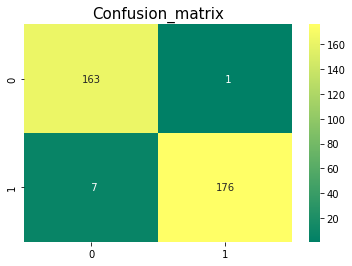

In [ ]:
#Confusion matrices For LogicalRegression
from sklearn.metrics import confusion_matrix  
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)
#Confusion Matrix gives us a matrix as output and describes the complete performance of the model.Confusion Matrix forms the basis for the other types of metrics.
#Our values are TP=176 TN=163 FP=7 FN=1
#Precision = 176/183 = 0,96
#Precision is how certain you are of your true positives. So we can say that by the matrix our model is certain

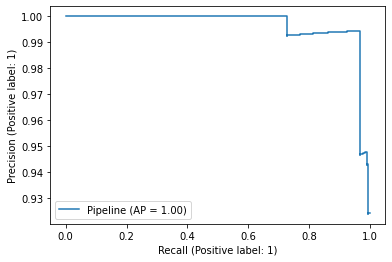

In [ ]:
#Plotting Precision Recall curve for LogicalRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_precision_recall_curve
p = Pipeline([('mod', LogisticRegression(random_state=0))
])
p.fit(x_train, y_train)
plot_precision_recall_curve(p, x_test, y_test)
#The right upper corner is what we ideally want and our curve is not exactly there. This is good thing 
#Area under the curve is important for us.We have more area so we have better model.

# k-NN Classification

In [ ]:
# Elbow for Classifier
def Elbow(K,p,x_train,y_train,x_valid,y_valid):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i,p=p)
        clf.fit(x_train, y_train)
        # Appending F1 scores to empty list calculated using the predictions
        tmp = clf.predict(x_valid)
        tmp = f1_score(tmp,y_valid)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

## k-NN for Manhattan Distance p=1

Text(0.5, 1.0, 'Elbow Curve for test')

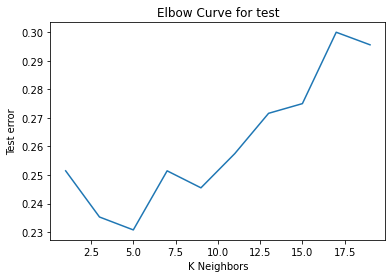

In [ ]:
k = range(1, 20,2)
test = Elbow(k,1,x_train,y_train,x_valid,y_valid)
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
#We can see the lower part is 5 so we are selecting the n_neighbors equls 5

In [ ]:
clf = KNN(n_neighbors = 5,p=1)

# Fitting the model
clf.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1 score
test_predict = clf.predict(x_valid)
k = f1_score(test_predict, y_valid)
print('Test F1 Score    ', k )

Test F1 Score     0.7692307692307693


In [ ]:
model = KNeighborsClassifier(n_neighbors = 5,p=1)
model.fit(x_train,y_train)
prediction_knn1=model.predict(x_valid)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',
      round(accuracy_score(prediction_knn1,
                           y_valid)*100,2))
print("---------------------------------------------------------------------")
print(classification_report(y_valid,prediction_knn1))

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 77.59
---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        85
           1       0.81      0.73      0.77        89

    accuracy                           0.78       174
   macro avg       0.78      0.78      0.78       174
weighted avg       0.78      0.78      0.78       174



In [ ]:
kfold = KFold(n_splits=10)                          # k=10, split the data into 10 equal parts
      

result_knn=cross_val_score(clf,
                           x,
                           y,
                           cv=10,
                           scoring='accuracy')

print('The cross validated score for K Nearest Neighbors Classifier is:',
      round(result_knn.mean()*100,2))

The cross validated score for K Nearest Neighbors Classifier is: 80.46


In [ ]:
#Our cross validation score for Knn is 80 and accuracy of the Classifier is 77.59. We can see that cross validation is greater than the our model.
#An our model for p=1 is giving better results comparing to p=2 but when compared to logistic regression there is mroe than 15 point difference.
#Important thing is getting the best possible validation accuracy, since this is actually somewhat reflective of how the model will perform in the real life.
#F1 Score is used to measure a test’s accuracy and it is 0.78

Text(0.5, 1.05, 'Confusion_matrix')

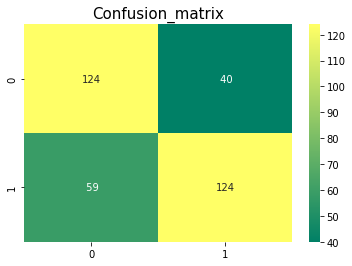

In [ ]:
y_pred = cross_val_predict(model,
                           x_test,
                           y_test,
                           cv=10)

sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='3.0f',
            cmap="summer")

plt.title('Confusion_matrix',
          y=1.05,
          size=15)
#Confusion Matrix gives us a matrix as output and describes the complete performance of the model.Confusion Matrix forms the basis for the other types of metrics.
#Our values are TP=124 TN=124 FP=59 FN=40
#Precision = 124/183 = 0,67
#Precision is how certain you are of your true positives. Our model is not as good as logistic regression.But better than the second knn model with p=2()

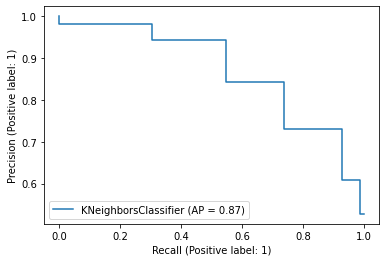

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_precision_recall_curve
p = KNN(n_neighbors=5,p=1)
p.fit(x_train, y_train)
plot_precision_recall_curve(p, x_test, y_test)
#The right upper corner is what we ideally want and our curve is not exactly there. This is good thing 
#Area under the curve is important for us.We can say that this model is not good as the logistic regression but better than the knn with p=2(Euclidean)

## k-NN for Euclidean Distance p=2

Text(0.5, 1.0, 'Elbow Curve for test')

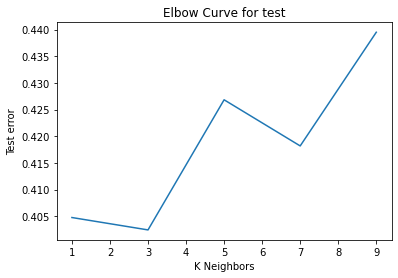

In [ ]:
k = range(1, 10,2)
test = Elbow(k,2,x_train,y_train,x_valid,y_valid)
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
#We can see the lower part is 3 so we are selecting the n_neighbors equls 3

In [ ]:
clf2 = KNN(n_neighbors = 3,p=2)

# Fitting the model
clf2.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
test_predict = clf2.predict(x_valid)
k = f1_score(test_predict, y_valid)
print('Test F1 Score    ', k )


Test F1 Score     0.5975609756097562


In [ ]:
model = KNeighborsClassifier(n_neighbors = 3,p=2)
model.fit(x_train,y_train)
prediction_knn2=model.predict(x_valid)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',
      round(accuracy_score(prediction_knn2,
                           y_valid)*100,2))
print("---------------------------------------------------------------------")
print(classification_report(y_valid,prediction_knn2))

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 62.07
---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        85
           1       0.65      0.55      0.60        89

    accuracy                           0.62       174
   macro avg       0.62      0.62      0.62       174
weighted avg       0.63      0.62      0.62       174



In [ ]:
kfold = KFold(n_splits=10)                          # k=10, split the data into 10 equal parts
      

result_knn=cross_val_score(clf2,
                           x,
                           y,
                           cv=10,
                           scoring='accuracy')

print('The cross validated score for K Nearest Neighbors Classifier is:',
      round(result_knn.mean()*100,2))

The cross validated score for K Nearest Neighbors Classifier is: 67.21


In [ ]:
#Our cross validation score for Knn is 67 and accuracy of the Classifier is 62. We can see that cross validation is greater than the our model.
#An our model for p=2 is not giving better results comparing to p=2 but when compared to logistic regression there is mroe than 15 points difference.
#Important thing is getting the best possible validation accuracy, since this is actually somewhat reflective of how the model will perform in the real life.
#Selecting the knn is not best thing to do in this dataset.
#F1 Score is used to measure a test’s accuracy and it is 0.64

Text(0.5, 1.05, 'Confusion_matrix')

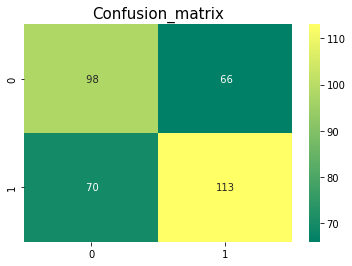

In [ ]:
y_pred = cross_val_predict(model,
                           x_test,
                           y_test,
                           cv=10)

sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='3.0f',
            cmap="summer")

plt.title('Confusion_matrix',
          y=1.05,
          size=15)

#Confusion Matrix gives us a matrix as output and describes the complete performance of the model.Confusion Matrix forms the basis for the other types of metrics.
#Our values are TP=113 TN=98 FP=70 FN=66
#Precision = 113/183 = 0,61
#Precision is how certain you are of your true positives. Our model is not as good as logistic regression also not good as the knn with p=1 coomparing the scores

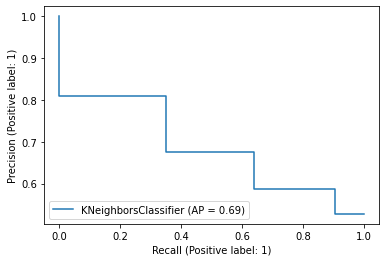

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_precision_recall_curve
p = KNN(n_neighbors=3,p=2)
p.fit(x_train, y_train)
plot_precision_recall_curve(p, x_test, y_test)
#The right upper corner is what we ideally want and our curve is not exactly there. This is good thing 
#Area under the curve is important for us.We can say that this model is not good as the logistic regression and also not good as the knn with p=1(manhattan)

In [ ]:
print("ACCURACY OF THE KNN and LOGISCTIC REGRESSION ON SAME TABLE")
print("Logistic Regression-------",(accuracy_logreg)*100)
print("KNN for Manhattan Distance-------",round(accuracy_score(prediction_knn1,
                           y_valid)*100,2))
print("KNN for Euclidean Distance--------",round(accuracy_score(prediction_knn2,
                           y_valid)*100,2))
#We can say that by the accuracy of the models Logistic Regression is giving the best results fot our dataset. Which we have so many rows and some categorical variables.

ACCURACY OF THE KNN and LOGISCTIC REGRESSION ON SAME TABLE
Logistic Regression------- 97.23174539897681
KNN for Manhattan Distance------- 77.59
KNN for Euclidean Distance-------- 62.07
